# 4. 파이토치 기본
## 4.2 역전파 - 선형회귀식

In [1]:
import torch
from matplotlib import pyplot as plt

In [2]:
x = torch.FloatTensor(range(5)).unsqueeze(1)
y = 2*x + torch.rand(5,1)
num_features = x.shape[1]

In [3]:
print(x.shape, y.shape)

torch.Size([5, 1]) torch.Size([5, 1])


In [4]:
#dtype = torch.FloatTensor
#W = Variable(torch.randn(num_features, 1), requires_grad=True)
#b = Variable(torch.randn(1), requires_grad=True)
w = torch.randn(num_features, 1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

In [5]:
learning_rate = 1e-3
optimizer = torch.optim.SGD([w, b], lr=learning_rate)

In [6]:
print(w.shape, b.shape)

torch.Size([1, 1]) torch.Size([1])


In [7]:
loss_stack = []  # epochs 마다 손실 함수 값을 저장하기 위해 빈 리스트 생성
for epoch in range(1001):
    
    optimizer.zero_grad()    # 최적화는 계산을 누적시키기 때문에 매 에폭마다 누적된 값을 초기화 함
    
    y_hat = torch.matmul(x, w) + b  # 회귀식 모델을 이용
    loss = torch.mean((y_hat-y)**2) # mean square error  
    
    loss.backward()  # 역전파의 기준을 손실 함수로 정한다.
    optimizer.step() 
    loss_stack.append(loss.item())  # 그래프를 그리기 위해 손실 함수값을 하나씩 넣는다. item을 쓰지 않으면 한 번에 전체를 저장함
    
    if epoch % 100 == 0:
        print(f'Epoch {epoch}:{loss.item()}')

Epoch 0:30.18821144104004
Epoch 100:2.101323366165161
Epoch 200:0.2070852816104889
Epoch 300:0.07582108676433563
Epoch 400:0.06361432373523712
Epoch 500:0.05979855731129646
Epoch 600:0.05688447505235672
Epoch 700:0.05433005094528198
Epoch 800:0.052065372467041016
Epoch 900:0.05005577206611633
Epoch 1000:0.04827238246798515


In [8]:
with torch.no_grad():
    y_hat = torch.matmul(x, w) + b

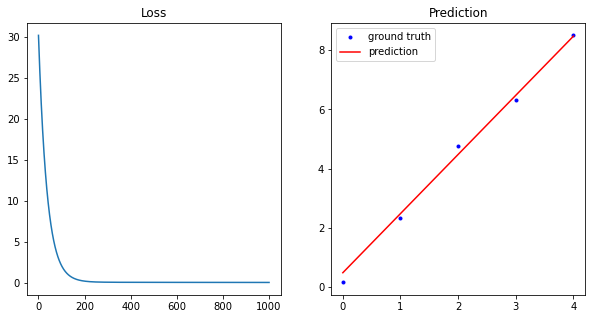

In [9]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.plot(loss_stack)
plt.title("Loss")
plt.subplot(122)
plt.plot(x, y,'.b')
plt.plot(x, y_hat, 'r-')
plt.legend(['ground truth','prediction'])
plt.title("Prediction")
plt.show()